In [31]:
from scripts.core import Scrapinator
import numpy as np

# 1 - SCRAPPING ET TRAITEMENT DES DONNÉES

In [32]:
scrapinator = Scrapinator(["gonzague", "koumassi"], 1, 1)

 ____    ____  ____      _     ____   ___  _   _     _     _____   ___   ____  
/ ___|  / ___||  _ \    / \   |  _ \ |_ _|| \ | |   / \   |_   _| / _ \ |  _ \ 
\___ \ | |    | |_) |  / _ \  | |_) | | | |  \| |  / _ \    | |  | | | || |_) |
 ___) || |___ |  _ <  / ___ \ |  __/  | | | |\  | / ___ \   | |  | |_| ||  _ < 
|____/  \____||_| \_\/_/   \_\|_|    |___||_| \_|/_/   \_\  |_|   \___/ |_| \_\
                                                                               


Bienvenue dans Scrapinator, le scraper de groupes Facebook pour la récupération d'infos sur les maisons en location!


In [33]:
# executer le script full_script.py avec scrapinator.zone
!python extraction_script.py {scrapinator.zone[0]} {scrapinator.zone[1]} {scrapinator.nb_page_google} {scrapinator.nb_page_fb_group}

extraction_script.py:18: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Firefox(executable_path=config["GECKO_DRIVER_PATH"])
 _____ __  __ _____  ____      _      ____  _____   ___   ____  
| ____|\ \/ /|_   _||  _ \    / \    / ___||_   _| / _ \ |  _ \ 
|  _|   \  /   | |  | |_) |  / _ \  | |      | |  | | | || |_) |
| |___  /  \   | |  |  _ <  / ___ \ | |___   | |  | |_| ||  _ < 
|_____|/_/\_\  |_|  |_| \_\/_/   \_\ \____|  |_|   \___/ |_| \_\
                                                                

Processus de recuperation des donnees en cours veuillez patienter ...


Nombre de page a traiter : 1

Nombre de groupes a traiter : 0

Nombre de processeur disponible pour la parallelisation : 
10
Traceback (most recent call last):
  File "extraction_script.py", line 90, in <module>
    df = pd.concat([pd.DataFrame(lst) for lst in ListeDictionnaire])
  File "/Users/turing/miniforge3/envs/ml/lib/python3.8/site-packages

In [34]:
results = scrapinator.transformer()

 _                              __                                 _                
| |_  _ __   __ _  _ __   ___  / _|  ___   _ __  _ __ ___    __ _ | |_   ___   _ __ 
| __|| '__| / _` || '_ \ / __|| |_  / _ \ | '__|| '_ ` _ \  / _` || __| / _ \ | '__|
| |_ | |   | (_| || | | |\__ \|  _|| (_) || |   | | | | | || (_| || |_ | (_) || |   
 \__||_|    \__,_||_| |_||___/|_|   \___/ |_|   |_| |_| |_| \__,_| \__| \___/ |_|   
                                                                                    


Transformation des données en cours...
Dimensions du dataframe : 
(41, 11)


/Users/turing/Desktop/turing/projets/loyer_scrapping/scripts/core.py:185: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data_features = old_data.append(self.data_features, ignore_index=True)


In [35]:
results.head()

,loyer,nombre_piece,annee_publication,jour_publication,mois_publication,type_logement,standing,commune,quartier,nb_loyer,lien
0,0103901766,NaN,2021.0,4.0,8.0,immeuble,NaN,gonzague,NaN,NaN,https://facebook.com/716175952319410/posts/903...
1,75.000,2,2023.0,22.0,2.0,appartement,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...
2,NaN,NaN,2023.0,22.0,2.0,NaN,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...
3,LOYER:230.000f,3,2023.0,22.0,2.0,immeuble,NaN,koumassi,NaN,NaN,https://facebook.com/716175952319410/posts/129...
4,NaN,NaN,2023.0,22.0,2.0,NaN,NaN,koumassi,NaN,NaN,https://facebook.com/716175952319410/posts/129...


# 2 - TRAITEMENT DES DONNÉES

In [36]:
# importation du module pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
# load data
df = pd.read_csv("data/resultat.csv")
print(df.shape)
df.head()

(100, 11)


,loyer,nombre_piece,annee_publication,jour_publication,mois_publication,type_logement,standing,commune,quartier,nb_loyer,lien
0,0103901766,NaN,2021.0,4.0,8.0,immeuble,NaN,gonzague,NaN,NaN,https://facebook.com/716175952319410/posts/903...
1,75.000,2,2023.0,22.0,2.0,appartement,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...
2,NaN,NaN,2023.0,22.0,2.0,NaN,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...
3,LOYER:230.000f,3,2023.0,22.0,2.0,immeuble,NaN,koumassi,NaN,NaN,https://facebook.com/716175952319410/posts/129...
4,NaN,NaN,2023.0,22.0,2.0,NaN,NaN,koumassi,NaN,NaN,https://facebook.com/716175952319410/posts/129...


In [176]:
# supprimer les lignes ou les colonnes loyer nombre_piece type_logement sont nulles en même temps
df = df.dropna(subset=['loyer', 'nombre_piece'], how='all')
print(df.shape)
df.head(50)

(69, 11)


,loyer,nombre_piece,annee_publication,jour_publication,mois_publication,type_logement,standing,commune,quartier,nb_loyer,lien
0,0103901766,NaN,2021.0,4.0,8.0,immeuble,NaN,gonzague,NaN,NaN,https://facebook.com/716175952319410/posts/903...
1,75.000,2,2023.0,22.0,2.0,appartement,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...
3,LOYER:230.000f,3,2023.0,22.0,2.0,immeuble,NaN,koumassi,NaN,NaN,https://facebook.com/716175952319410/posts/129...
5,3pieces160.000,NaN,2023.0,22.0,2.0,NaN,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...
7,2Pieces55.000,NaN,2023.0,22.0,2.0,immeuble,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...
9,80.000,NaN,2023.0,21.0,2.0,NaN,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...
11,NaN,2,2023.0,21.0,2.0,appartement,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...
12,50.000,2,2023.0,21.0,2.0,appartement,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...
13,2,2,2023.0,21.0,2.0,immeuble,NaN,koumassi,NaN,NaN,https://facebook.com/716175952319410/posts/129...
15,NaN,2,2023.0,20.0,2.0,appartement,NaN,NaN,NaN,NaN,https://facebook.com/716175952319410/posts/129...


### 2.1 - Traitement des loyers

In [177]:
# modifier tous les loyers commencant par 0 par NaN
df['loyer'] = df['loyer'].replace(r'^0.*', np.nan, regex=True)

# mettre les valeurs de la colonne loyer en minuscule
# convertir en string pour pouvoir appliquer la méthode str.lower()
df['loyer'] = df['loyer'].astype(str)
df['loyer'] = df['loyer'].str.lower()

# remplacer pour chaque ligne si la colonne loyer contient la chaine de caractères pièces modifier nombre_piece par la valeur de la chaine de caractères avant pièces et modifier la valeur de la colonne loyer par la valeur de la chaine de caractères après pièces
df['nombre_piece'] = df.apply(lambda row: row['loyer'].split('pieces')[0] if 'pieces' in row['loyer'].lower() else row['nombre_piece'], axis=1)
df['loyer'] = df.apply(lambda row: row['loyer'].split('pieces')[1] if 'pieces' in row['loyer'] else row['loyer'].lower(), axis=1)

# supprimer LOYER_ de chaines de caractères de la colonne loyer
df['loyer'] = df['loyer'].str.replace('LOYER_', '')

# supprimer LOYER: de chaines de caractères de la colonne loyer
df['loyer'] = df['loyer'].str.replace('LOYER:', '')

# supprimer le caractère _ de la colonne loyer
df['loyer'] = df['loyer'].str.replace('_', '')

# supprimer le caractère . de la colonne loyer
df['loyer'] = df['loyer'].str.replace('.', '')

# supprimer le caratère "f" de la colonne loyer
df['loyer'] = df['loyer'].str.replace('f', '')

# convertir la colonne loyer en numérique et remplacer par NaN les valeurs qui bloquent la conversion
df['loyer'] = pd.to_numeric(df['loyer'], errors='coerce')

# si la valeur de la colonne loyer est inférieure à 1000 alors multiplier par 1000
df['loyer'] = df.apply(lambda row: row['loyer'] * 1000 if row['loyer'] < 1000 else row['loyer'], axis=1)

# definir le standing en fonction du loyer


/var/folders/93/159yhqzd4kjgvy5_3lt16knc0000gn/T/ipykernel_57175/2821310083.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['loyer'] = df['loyer'].str.replace('.', '')


In [178]:
# imputer le nombre de pièces par 0, le loyer par 0 le type de logement par "non renseigné",
# le standing par "non renseigné", le quartier par "non renseigné"
df['nombre_piece'] = df['nombre_piece'].fillna(-1)
df['loyer'] = df['loyer'].fillna(-1)
df['nb_loyer'] = df['nb_loyer'].fillna(-1)
df['type_logement'] = df['type_logement'].fillna("indisponible")
df['standing'] = df['standing'].fillna("indisponible")
df['quartier'] = df['quartier'].fillna("indisponible")
df['commune'] = df['commune'].fillna("indisponible")
df.head(50)

,loyer,nombre_piece,annee_publication,jour_publication,mois_publication,type_logement,standing,commune,quartier,nb_loyer,lien
0,-1.0,-1,2021.0,4.0,8.0,immeuble,indisponible,gonzague,indisponible,-1.0,https://facebook.com/716175952319410/posts/903...
1,75000.0,2,2023.0,22.0,2.0,appartement,indisponible,indisponible,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
3,-1.0,3,2023.0,22.0,2.0,immeuble,indisponible,koumassi,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
5,160000.0,3,2023.0,22.0,2.0,indisponible,indisponible,indisponible,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
7,55000.0,2,2023.0,22.0,2.0,immeuble,indisponible,indisponible,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
9,80000.0,-1,2023.0,21.0,2.0,indisponible,indisponible,indisponible,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
11,-1.0,2,2023.0,21.0,2.0,appartement,indisponible,indisponible,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
12,50000.0,2,2023.0,21.0,2.0,appartement,indisponible,indisponible,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
13,2000.0,2,2023.0,21.0,2.0,immeuble,indisponible,koumassi,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
15,-1.0,2,2023.0,20.0,2.0,appartement,indisponible,indisponible,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...


In [179]:

# imputer le nombre de pièces par par le mode de la colonne nombre_piece et le loyer par la médiane de la colonne loyer en fonction du type de logement et de la commune
df.loc[df['nombre_piece'] == -1, 'nombre_piece'] = df.groupby(['type_logement', 'commune'])['nombre_piece'].transform(lambda x: x.mode()[0])
df.loc[df['loyer'] == -1, 'loyer'] = df.groupby(['type_logement', 'commune'])['loyer'].transform(lambda x: x.median())
df['nombre_piece'] = pd.to_numeric(df['nombre_piece'], errors='coerce')
df.head(50)


/var/folders/93/159yhqzd4kjgvy5_3lt16knc0000gn/T/ipykernel_57175/164587838.py:2: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  df.loc[df['nombre_piece'] == -1, 'nombre_piece'] = df.groupby(['type_logement', 'commune'])['nombre_piece'].transform(lambda x: x.mode()[0])


,loyer,nombre_piece,annee_publication,jour_publication,mois_publication,type_logement,standing,commune,quartier,nb_loyer,lien
0,-1.0,-1.0,2021.0,4.0,8.0,immeuble,indisponible,gonzague,indisponible,-1.0,https://facebook.com/716175952319410/posts/903...
1,75000.0,2.0,2023.0,22.0,2.0,appartement,indisponible,indisponible,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
3,999.5,3.0,2023.0,22.0,2.0,immeuble,indisponible,koumassi,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
5,160000.0,3.0,2023.0,22.0,2.0,indisponible,indisponible,indisponible,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
7,55000.0,2.0,2023.0,22.0,2.0,immeuble,indisponible,indisponible,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
9,80000.0,-1.0,2023.0,21.0,2.0,indisponible,indisponible,indisponible,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
11,60000.0,2.0,2023.0,21.0,2.0,appartement,indisponible,indisponible,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
12,50000.0,2.0,2023.0,21.0,2.0,appartement,indisponible,indisponible,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
13,2000.0,2.0,2023.0,21.0,2.0,immeuble,indisponible,koumassi,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...
15,60000.0,2.0,2023.0,20.0,2.0,appartement,indisponible,indisponible,indisponible,-1.0,https://facebook.com/716175952319410/posts/129...


In [180]:
df.to_csv("data/final_df.csv", index=False)
df.shape

(69, 11)

# 3 - ANALYSE DES DONNÉES

In [181]:
# loyer moyen par commune dans un dataframe
df[df["commune"] !="indisponible"][df["loyer"] != -1].groupby("commune")["loyer"].mean().sort_values(ascending=False).reset_index().head()

/var/folders/93/159yhqzd4kjgvy5_3lt16knc0000gn/T/ipykernel_57175/3172629293.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["commune"] !="indisponible"][df["loyer"] != -1].groupby("commune")["loyer"].mean().sort_values(ascending=False).reset_index().head()


,commune,loyer
0,koumassi,116142.785714
1,gonzague,47500.000000


In [182]:
# loyer moyen par commune et par type de logement
df[df["commune"] !="indisponible"][df["loyer"] != -1].groupby(["commune", "type_logement"])["loyer"].mean().sort_values(ascending=False).reset_index().head()

/var/folders/93/159yhqzd4kjgvy5_3lt16knc0000gn/T/ipykernel_57175/2817215755.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["commune"] !="indisponible"][df["loyer"] != -1].groupby(["commune", "type_logement"])["loyer"].mean().sort_values(ascending=False).reset_index().head()


,commune,type_logement,loyer
0,koumassi,appartement,230000.00
1,koumassi,indisponible,80000.00
2,gonzague,indisponible,47500.00
3,koumassi,maison basse,40000.00
4,koumassi,immeuble,1499.75


/var/folders/93/159yhqzd4kjgvy5_3lt16knc0000gn/T/ipykernel_57175/2105261890.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(x="type_logement", y="loyer", data=df[df['loyer'] != -1][df["type_logement"] != "indisponible"], hue="type_logement", palette="Set3")


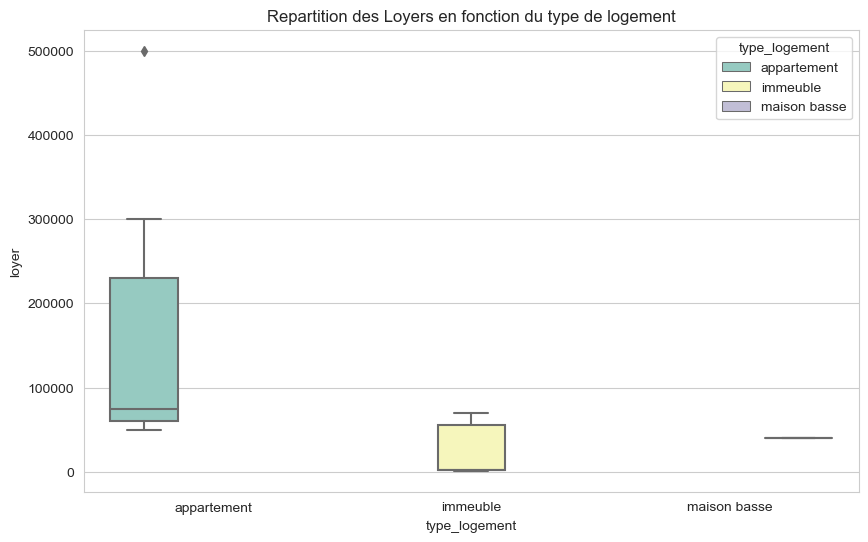

In [183]:
# loyer en fonction du du type de logement skip les lignes ou le loyer est -1 et le type de logement est "indisponible"
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x="type_logement", y="loyer", data=df[df['loyer'] != -1][df["type_logement"] != "indisponible"], hue="type_logement", palette="Set3")
plt.title("Repartition des Loyers en fonction du type de logement")
plt.show()

/var/folders/93/159yhqzd4kjgvy5_3lt16knc0000gn/T/ipykernel_57175/1639049808.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.boxplot(x="commune", y="loyer", data=df[df['loyer'] != -1][df["commune"] != "indisponible"], palette="Set3")


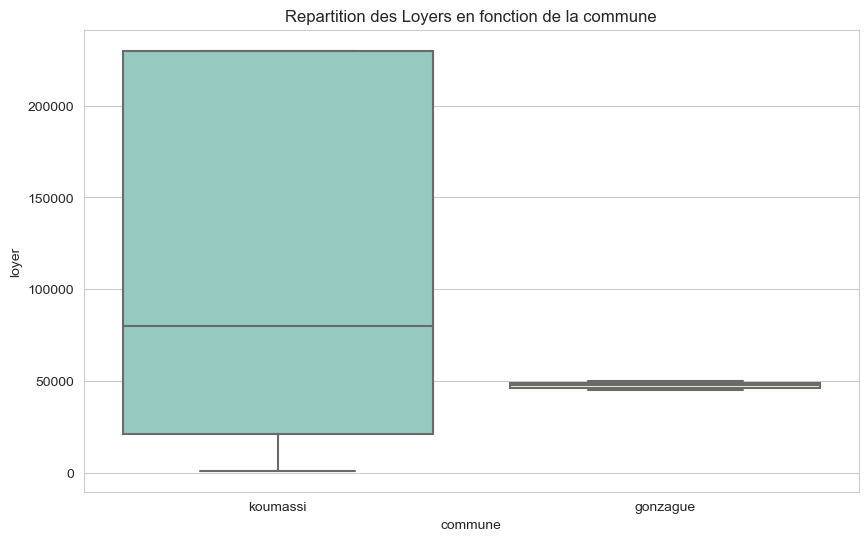

In [184]:
# loyer en fonction de la commune skip les lignes ou le loyer est -1 et la commune est "indisponible"
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x="commune", y="loyer", data=df[df['loyer'] != -1][df["commune"] != "indisponible"], palette="Set3")
plt.title("Repartition des Loyers en fonction de la commune")
plt.show()